In [1]:
ls

(W) Nike Dunk High Aluminum.csv
(W) Nike Dunk High Black and White.csv
(W) Nike Dunk High Black and White_270.csv
(W) Nike Dunk High Cashmere.csv
(W) Nike Dunk High Crimson Tint.csv
(W) Nike Dunk High Dark Sulfur.csv
(W) Nike Dunk High Football Grey.csv
(W) Nike Dunk High Moon Fossil.csv
(W) Nike Dunk High Orange Blaze.csv
(W) Nike Dunk High SE First Use Sail University Orange.csv
(W) Nike Dunk High SP Varsity Purple.csv
(W) Nike Dunk High Sail Gum.csv
(W) Nike Dunk High Team Red.csv
(W) Nike Dunk High Up Black and White.csv
(W) Nike Dunk High Up Iron Purple.csv
(W) Nike Dunk High Up Summit White.csv
Nike Dunk High 1985 SP Black Acid Wash.csv
Nike Dunk High Barely Green.csv
Nike Dunk High PRM EMB College Navy.csv
Nike Dunk High Premium EMB Court Purple.csv
Nike Dunk High Retro Black and White.csv
Nike Dunk High Retro Championship Navy.csv
Nike Dunk High Retro Game Royal.csv
Nike Dunk High Retro Orange Blaze.csv
Nike Dunk High Retro PRM Dark Curry.csv
Nike Dunk High Retro PRM Light Choc

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime


In [3]:
list_d = []

In [4]:
list_d = ["(W) Nike Dunk High Aluminum.csv"\
,"(W) Nike Dunk High Black and White.csv"\
,"(W) Nike Dunk High Cashmere.csv"\
,"(W) Nike Dunk High Crimson Tint.csv"\
,"(W) Nike Dunk High Dark Sulfur.csv"\
,"(W) Nike Dunk High Football Grey.csv"\
,"(W) Nike Dunk High Moon Fossil.csv"\
,"(W) Nike Dunk High Orange Blaze.csv"\
,"(W) Nike Dunk High SE First Use Sail University Orange.csv"\
,"(W) Nike Dunk High SP Varsity Purple.csv"\
,"(W) Nike Dunk High Sail Gum.csv"\
,"(W) Nike Dunk High Team Red.csv"\
,"(W) Nike Dunk High Up Black and White.csv"\
,"(W) Nike Dunk High Up Iron Purple.csv"\
,"(W) Nike Dunk High Up Summit White.csv"\
,"Nike Dunk High 1985 SP Black Acid Wash.csv"\
,"Nike Dunk High Barely Green.csv"\
,"Nike Dunk High PRM EMB College Navy.csv"\
,"Nike Dunk High Premium EMB Court Purple.csv"\
,"Nike Dunk High Retro Black and White.csv"\
,"Nike Dunk High Retro Championship Navy.csv"\
,"Nike Dunk High Retro Game Royal.csv"\
,"Nike Dunk High Retro Orange Blaze.csv"\
,"Nike Dunk High Retro PRM Dark Curry.csv"\
,"Nike Dunk High Retro PRM Light Chocolate.csv"\
,"Nike Dunk High Retro Vast Grey.csv"\
,"Nike Dunk High SE First Use Sail.csv"\
,"Nike Dunk High SE First Use University Red.csv"\
,"Nike Dunk High SP Maize & Blue.csv"\
,"Nike Dunk High SP Pure Platinum.csv"\
,"Nike Dunk High SP Spartan Green.csv"\
,"Nike Dunk High SP Varsity Maize.csv"\
,"Nike SB Dunk High Pro Baroque Brown.csv"\
,"Nike SB Dunk High Pro Doraemon.csv"\
,"Nike SB Dunk High Pro Hawaii.csv"\
,"Nike SB Dunk High Pro Invert Celtics.csv"\
,"Nike SB Dunk High Pro Maize and Black.csv"\
,"Nike SB Dunk High Pro Spectrum.csv"\
,"Nike SB Dunk High Pro Test Pattern.csv"\
,"Nike SB Dunk High Sail Bright Crimson.csv"\
,"Nike SB Dunk High Space Jam.csv"\
,"Nike x Ambush Dunk High Black.csv"\
,"Nike x Ambush Dunk High Cosmic Fuchsia.csv"\
,"Nike x Ambush Dunk High Deep Royal Blue.csv"\
,"Nike x Ambush Dunk High Flash Lime.csv"\
,"Nike x Bodega Dunk High Legend.csv"\
,"Nike x Carpet Company SB Dunk High PRM QS Royal Pulse.csv"\
,"Nike x Color Skates SB Dunk High Pro Kebab and Destroy.csv"\
,"Nike x Concepts SB Dunk High Pro Mallard.csv"\
,"Nike x Fragment Dunk High Black.csv"\
,"Nike x Gundam SB Dunk High Pro QS Unicorn RX-0.csv"\
,"Nike x Notre Dunk High Blue Void.csv"\
,"Nike x Notre Dunk High Light Orewood Brown.csv"\
,"Nike x Slam Jam Dunk High SP Clear Black.csv"\
,"Nike x Undercover Dunk High 1985 Gym Red.csv"]

In [ ]:
# 'buy'의 날짜 datetime으로 바꾸기 21/1/2 => 21-1-2
for n in list_d:
    df = pd.read_csv(f"{n}")
    df['buy'] = pd.to_datetime(df['buy'], yearfirst=True)
    df.to_csv(f"{n}", index = False)

In [ ]:
# 'price'의 원 빼고 160,000원 => 160000.0
for n in list_d:
    df = pd.read_csv(f"{n}")
    for a in range(len(df["price"])):
        df["price"][a] = df["price"][a].split('원')[0].split(',')[0] + df["price"][a].split('원')[0].split(',')[1]
    df["price"] = df["price"].astype('float')
    df.to_csv(f"{n}", index = False)

In [9]:
df = pd.read_csv("Nike x Undercover Dunk High 1985 Gym Red.csv")
df

,size,price,buy
0,270,269000.0,2021-07-28
1,270,260000.0,2021-07-28
2,270,259000.0,2021-07-28
3,270,255000.0,2021-07-28
4,270,259000.0,2021-07-28
...,...,...,...
338,270,169000.0,2022-01-11
339,270,170000.0,2022-01-11
340,270,170000.0,2022-01-14
341,270,170000.0,2022-01-14


In [10]:
df['buy'] = pd.to_datetime(df['buy'])
df = df.set_index('buy') # buy 컬럼을 인덱스로 설정.
df

,size,price
buy,,
2021-07-28,270,269000.0
2021-07-28,270,260000.0
2021-07-28,270,259000.0
2021-07-28,270,255000.0
2021-07-28,270,259000.0
...,...,...
2022-01-11,270,169000.0
2022-01-11,270,170000.0
2022-01-14,270,170000.0


In [11]:
df = df.resample('D').mean()
df

,size,price
buy,,
2021-07-28,270.0,225589.743590
2021-07-29,270.0,206076.923077
2021-07-30,270.0,196318.181818
2021-07-31,270.0,197133.333333
2021-08-01,270.0,193800.000000
...,...,...
2022-01-13,NaN,NaN
2022-01-14,270.0,170000.000000
2022-01-15,NaN,NaN


In [12]:
df['size'].fillna(method = 'ffill', inplace = True)
df

,size,price
buy,,
2021-07-28,270.0,225589.743590
2021-07-29,270.0,206076.923077
2021-07-30,270.0,196318.181818
2021-07-31,270.0,197133.333333
2021-08-01,270.0,193800.000000
...,...,...
2022-01-13,270.0,NaN
2022-01-14,270.0,170000.000000
2022-01-15,270.0,NaN


In [ ]:
df = df.fillna(method='ffill')
df

In [14]:
for n in list_d:
    df = pd.read_csv(f"{n}")
    
    df = df.drop('size', axis=1) # size 컬럼 삭제
    df['buy'] = pd.to_datetime(df['buy'])
    df = df.set_index('buy') # buy 컬럼을 인덱스로 설정.
    num = len(df.index) # 총 거래수
    df = df.resample('D').mean() # 누락 된 날짜 외에도 중복 날짜를 처리
    #df = df.fillna(method='ffill') # 결측치 처리(앞의 값으로 채우기)
    
    df.to_csv(f"{n}")
    

In [15]:
df = pd.read_csv("(W) Nike Dunk High Team Red.csv")
df

,buy,price
0,2021-02-23,300000.0
1,2021-02-24,NaN
2,2021-02-25,NaN
3,2021-02-26,NaN
4,2021-02-27,NaN
...,...,...
316,2022-01-05,325000.0
317,2022-01-06,NaN
318,2022-01-07,NaN
319,2022-01-08,NaN


<AxesSubplot:>

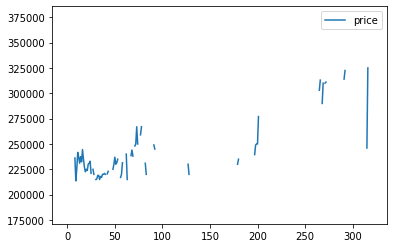

In [20]:
df.plot()

In [ ]:
for n in list_d:
    df = pd.read_csv(f"{n}")
    
    df['buy'] = pd.to_datetime(df['buy'], yearfirst=True) # buy 컬럼 datetime형식으로
    df = df.drop('size', axis=1) # size 컬럼 삭제
    
    # 'price'의 원 빼고 160,000원 => 160000.0
    for a in range(len(df["price"])):
        df["price"][a] = df["price"][a].split('원')[0].split(',')[0] + df["price"][a].split('원')[0].split(',')[1]
    df["price"] = df["price"].astype('float')
    
    df['buy'] = pd.to_datetime(df['buy']) # buy 컬럼 datetime형식으로
    df = df.set_index('buy') # buy 컬럼을 인덱스로 설정.
    num = len(df.index) # 총 거래수
    
    df = df.resample('D').mean() # 누락 된 날짜 외에도 중복 날짜를 처리
    #df = df.fillna(method='ffill') # 결측치 처리(앞의 값으로 채우기)
    
    df.to_csv(f"{num}_{n}")
    

**최초리셀가**

In [31]:
p_name = []
p_day = []
p_price1 = []
p_price2 = []
p_price3 = []
p_min = []
df1 = pd.DataFrame()

for n in list_d:
    df = pd.read_csv(f"{n}")
    
    df['buy'] = pd.to_datetime(df['buy'], yearfirst=True) # buy 컬럼 datetime형식으로
#     df = df.drop('size', axis=1) # size 컬럼 삭제
    
    # 'price'의 원 빼고 160,000원 => 160000.0
#     for a in range(len(df["price"])):
#         df["price"][a] = df["price"][a].split('원')[0].split(',')[0] + df["price"][a].split('원')[0].split(',')[1]
    df["price"] = df["price"].astype('float')
    
    df['buy'] = pd.to_datetime(df['buy']) # buy 컬럼 datetime형식으로
    df = df.set_index('buy') # buy 컬럼을 인덱스로 설정.
    
    df = df.resample('D').mean() # 누락 된 날짜 외에도 중복 날짜를 처리
    #df = df.fillna(method='ffill') # 결측치 처리(앞의 값으로 채우기)
    
    df.reset_index(inplace=True) # index 새로 생성
    
    df['price'] = df['price'].round() # 가격 반올림
    
    p_name.append(n.split(".")[0])
    p_day.append(str(df.iloc[0,0]).split(":")[0].split(" ")[-2])    
    p_price1.append(df.iloc[0,1])
    p_price2.append(df.iloc[1,1])
    p_price3.append(df.iloc[2,1])
    df = df.loc[0:29]
    if df["price"].count() < 10 :
        p_min.append('0')
    elif df["price"].count() >= 10 :
        p_min.append(df["price"].min())

df1["name"] = p_name
df1["day1"] = p_day
df1["price1"] = p_price1
df1["price2"] = p_price2
df1["price3"] = p_price3
df1["min"] = p_min

df1['price2'] = np.where(pd.notnull(df1['price2']) == True, df1['price2'], df1['price1'])
df1['price3'] = np.where(pd.notnull(df1['price3']) == True, df1['price3'], df1['price2'])

df1.to_csv("dunk high 거래가.csv")
df1


,name,day1,price1,price2,price3,min
0,(W) Nike Dunk High Aluminum,2021-07-24,170000.0,150000.0,150750.0,132700.0
1,(W) Nike Dunk High Black and White,2021-05-01,299500.0,315000.0,350000.0,214500.0
2,(W) Nike Dunk High Cashmere,2021-07-10,140000.0,140000.0,140000.0,0
3,(W) Nike Dunk High Crimson Tint,2021-05-22,130000.0,130000.0,132500.0,123000.0
4,(W) Nike Dunk High Dark Sulfur,2021-04-16,207692.0,197200.0,193455.0,160000.0
5,(W) Nike Dunk High Football Grey,2021-01-06,166000.0,248667.0,246250.0,166000.0
6,(W) Nike Dunk High Moon Fossil,2021-11-16,149000.0,149000.0,143000.0,127000.0
7,(W) Nike Dunk High Orange Blaze,2021-04-02,170600.0,173923.0,173923.0,160818.0
8,(W) Nike Dunk High SE First Use Sail Universit...,2021-07-14,150000.0,138000.0,132000.0,120000.0
9,(W) Nike Dunk High SP Varsity Purple,2020-12-02,187500.0,198850.0,193556.0,176143.0


In [34]:
pd.read_csv("data_DunkHigh.csv")

,name,model,day,col1,col2,color,price,like,day1,price1,...,category,high/low,W1M0,line,scrap,disrupt,X,event,prm,emb
0,(W) Nike Dunk High Aluminum,DD1869-107,2021.8.17,white,blue,WHITE/ALUMINUM,"129,000","5,072",2021.7.24,170000,...,dunk,high,1,nm,0,0,0,0,0,0
1,(W) Nike Dunk High Black and White,DD1869-103,2021.5.1,white,black,WHITE/BLACK-UNIVERSITY RED,"129,000","10,000",2021.5.1,299500,...,dunk,high,1,nm,0,0,0,0,0,0
2,(W) Nike Dunk High Cashmere,DD1869-108,2021.8.17,white,pink,WHITE/CASHMERE-LEMON TWIST,"129,000",299,2021.7.10,140000,...,dunk,high,1,nm,0,0,0,0,0,0
3,(W) Nike Dunk High Crimson Tint,DD1869-104,2021.6.4,white,pink,SAIL/CRIMSON TINT,"129,000","1,381",2021.5.22,130000,...,dunk,high,1,nm,0,0,0,0,0,0
4,(W) Nike Dunk High Dark Sulfur,DD1869-106,2021.4.16,white,yellow,WHITE/DARK SULFUR-WHITE,"129,000","2,607",2021.4.16,207692,...,dunk,high,1,sp,0,0,0,0,0,0
5,(W) Nike Dunk High Football Grey,DD1869-102,2021.1.7,white,grey,SAIL/FOOTBALL GREY-PALE IVORY,"129,000","5,488",2021.1.6,166000,...,dunk,high,1,nm,0,0,0,0,0,0
6,(W) Nike Dunk High Moon Fossil,DD1869-002,2021.11.26,black,brown,BLACK/MOON FOSSIL-BLACK,"129,000",892,2021.11.16,149000,...,dunk,high,1,nm,0,0,0,0,0,0
7,(W) Nike Dunk High Orange Blaze,DD1869-100,2021.4.3,white,orange,WHITE/ORANGE BLAZE,"129,000","2,821",2021.4.2,170600,...,dunk,high,1,nm,0,0,0,0,0,0
8,(W) Nike Dunk High Sail Gum,DD1869-109,2021.10.9,white,ivory,WHITE/SAIL-GUM MEDIUM BROWN,"136,700","1,300",2021.11.7,120000,...,dunk,high,1,nm,0,0,0,0,0,0
9,(W) Nike Dunk High SE First Use Sail Universit...,DH6758-100,2021.7.14,white,orange,WHITE/SAIL-UNIVERSITY ORANGE,"139,000","1,061",2021.7.14,150000,...,dunk,high,1,se,0,0,0,0,0,0


In [ ]:
p_name = []
p_day = []
p_price1 = []
p_price2 = []
p_price3 = []
p_min = []
df1 = pd.DataFrame()

for n in list_d:
    df = pd.read_csv(f"{n}")
    
    df['buy'] = pd.to_datetime(df['buy'], yearfirst=True) # buy 컬럼 datetime형식으로
    df = df.drop('size', axis=1) # size 컬럼 삭제
    df = df.drop('Unnamed: 0', axis=1)
    
#     'price'의 원 빼고 160,000원 => 160000.0
    for a in range(len(df["price"])):
        df["price"][a] = df["price"][a].split('원')[0].split(',')[0] + df["price"][a].split('원')[0].split(',')[1]
    df["price"] = df["price"].astype('float')
    
    df['buy'] = pd.to_datetime(df['buy']) # buy 컬럼 datetime형식으로
    df = df.set_index('buy') # buy 컬럼을 인덱스로 설정.
    
    df = df.resample('D').mean() # 누락 된 날짜 외에도 중복 날짜를 처리
    #df = df.fillna(method='ffill') # 결측치 처리(앞의 값으로 채우기)
    
    df.reset_index(inplace=True) # index 새로 생성
    
            
    for p in range(len(df)):
        if df["price"][p]<10000:
            df["price"][p] = df["price"][p]*1000


    df['price'] = df['price'].round() # 가격 반올림
    
    p_name.append(n.split(".")[0].split("_")[1])
    p_day.append(str(df.iloc[0,0]).split(":")[0].split(" ")[-2])    
    p_price1.append(df.iloc[0,1])
    
#     p_price2.append(df.iloc[1,1])
#     p_price3.append(df.iloc[2,1])
#     df = df.loc[0:29]
#     if df["price"].count() < 10 :
#         p_min.append('0')
#     elif df["price"].count() >= 10 :
#         p_min.append(df["price"].min())
        
    df = df.loc[0:29]
    if df["price"].count() < 10 :
        p_min.append('0')
        p_price2.append(np.nan)
        p_price3.append(np.nan)
    elif df["price"].count() >= 10 :
        p_min.append(df["price"].min())
        p_price2.append(df.iloc[1,1])
        p_price3.append(df.iloc[2,1])

df1["name"] = p_name
df1["day1"] = p_day
df1["price1"] = p_price1
df1["price2"] = p_price2
df1["price3"] = p_price3
df1["min"] = p_min

df1['price2'] = np.where(pd.notnull(df1['price2']) == True, df1['price2'], df1['price1'])
df1['price3'] = np.where(pd.notnull(df1['price3']) == True, df1['price3'], df1['price2'])

df1.to_csv("New Balance(W) 거래가.csv")

df2 = pd.read_csv("(W)New Balance.csv")
# df2['day'] = pd.to_datetime(df2['day'], yearfirst=True) # 출시일 2019/12/13 -> 2019-12-13
for e in range(len(df2)):
    df2["price"][e] = df2['price'][e].split("원")[0].split(" ")[-1] # 출시가 형식 정리

df3 = pd.merge(df1, df2, on='name',how = 'left')
df3.to_csv("data_NewBalance(W).csv", index = False)
pd.read_csv("data_NewBalance(W).csv")